<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Pregnancies : 임신 횟수
- Glucose : 글루코오스(탄수화물 화합물)
- BloodPressure : 혈압
- SkinThickness : 피부 두께
- Insulin : 인슐린 수치
- BMI : BMI 지수
- DiabetesPedigreeFunction : 가족력
- Age : 나이
- Diabetes : 당뇨병일 경우 1 / 당뇨병이 아닐 경우 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c 2021-ai-w4-p1

  0% 0.00/16.3k [00:00<?, ?B/s]
100% 16.3k/16.3k [00:00<00:00, 26.5MB/s]
  0% 0.00/7.06k [00:00<?, ?B/s]
100% 7.06k/7.06k [00:00<00:00, 6.01MB/s]
  0% 0.00/1.48k [00:00<?, ?B/s]
100% 1.48k/1.48k [00:00<00:00, 3.95MB/s]


In [108]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('submit.csv')

In [7]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,1,95,60,18,58,23.9,0.260,22,0
1,5,105,72,29,325,36.9,0.159,28,0
2,0,135,68,42,250,42.3,0.365,24,1
3,4,131,68,21,166,33.1,0.160,28,0
4,1,103,30,38,83,43.3,0.183,33,0


In [8]:
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Diabetes                  537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.9 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               231 non-null    int64  
 1   Glucose                   231 non-null    int64  
 2   BloodPressure             231 non-null    int64  
 3   SkinThickness             231 non-null    int64  
 4   Insulin                   231 non-null    int64  
 5   BMI                       231 non-null    float64
 6   DiabetesPedigreeFunction  231 non-null    float64
 7   Age                       231 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 14.6 KB


데이터양이 작수

## EDA

In [12]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [11]:
#Diabetes
train['Diabetes'].value_counts()

0    349
1    188
Name: Diabetes, dtype: int64

분류

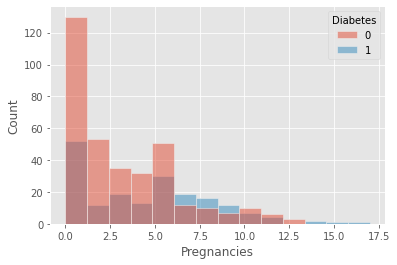

In [15]:
sns.histplot(data=train,x='Pregnancies',hue='Diabetes')

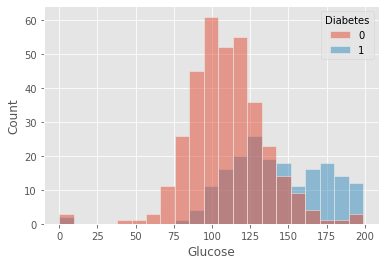

In [16]:
sns.histplot(data=train,x='Glucose',hue='Diabetes')

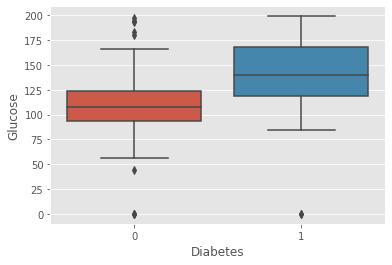

In [36]:
sns.boxplot(data=train,x='Diabetes',y='Glucose')

클루코스 양은 어느정도 연관성이 있어보임

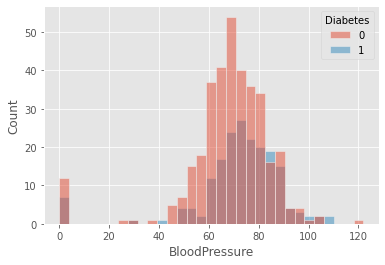

In [17]:
sns.histplot(data=train,x='BloodPressure',hue='Diabetes')

혈압은 잘 모르겠음

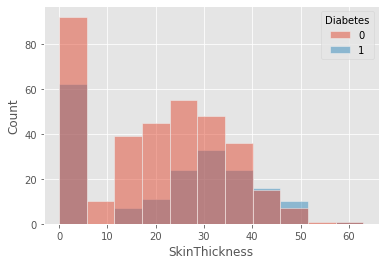

In [18]:
sns.histplot(data=train,x='SkinThickness',hue='Diabetes')

피부두께는 잘 모르겠음

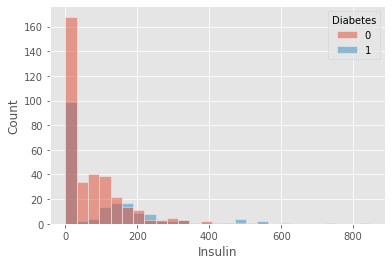

In [19]:
sns.histplot(data=train,x='Insulin',hue='Diabetes')


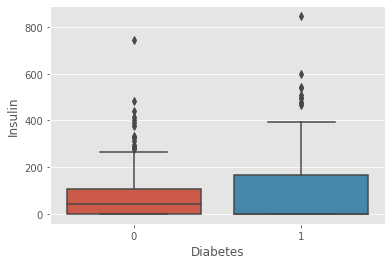

In [22]:
sns.boxplot(data=train,y='Insulin',x='Diabetes')

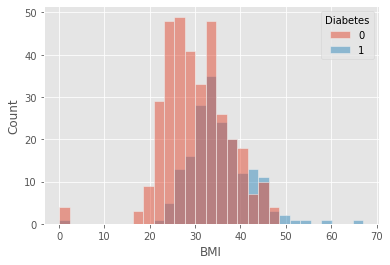

In [23]:
sns.histplot(data=train,x='BMI',hue='Diabetes')

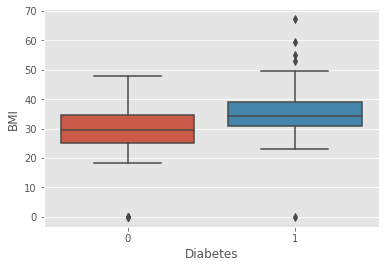

In [24]:
sns.boxplot(data=train,y='BMI',x='Diabetes')

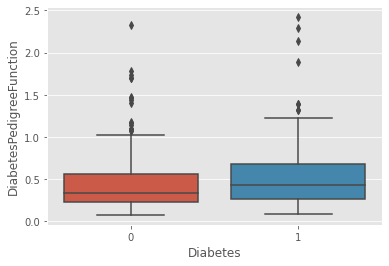

In [28]:
sns.boxplot(data=train,y='DiabetesPedigreeFunction',x='Diabetes')

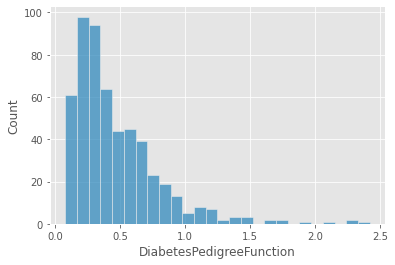

In [29]:
sns.histplot(data=train,x='DiabetesPedigreeFunction')

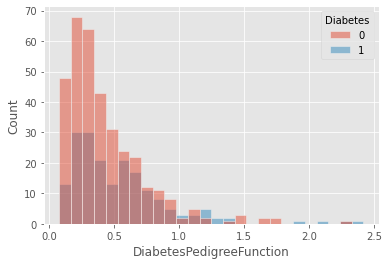

In [30]:
sns.histplot(data=train,x='DiabetesPedigreeFunction',hue='Diabetes')

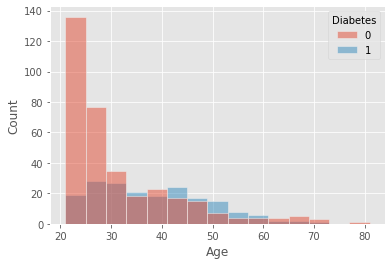

In [32]:
sns.histplot(data=train,x='Age',hue='Diabetes')

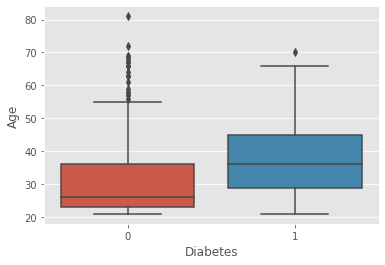

In [33]:
sns.boxplot(data=train,y='Age',x='Diabetes')

확실히 연령대가 더 높군

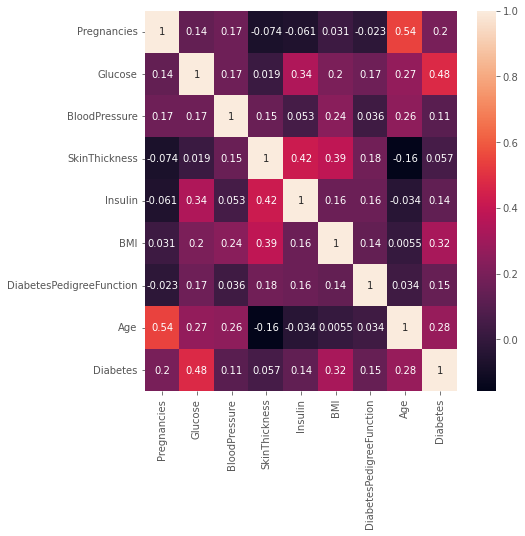

In [37]:
plt.figure(figsize=(7,7))
sns.heatmap(train.corr(),annot=True)

## 전처리

In [109]:
def outlier(df=None,column=None,weight=1.5):

  #column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함. 
  data=df[column]
  quantile_25=np.percentile(data.values,25)
  quantile_75=np.percentile(data.values,75)

  #IQR 구하고 IQR에 1.5를 곲해 최댓값과 최솟값 지점 구하기
  iqr=quantile_75-quantile_25
  iqr_weight=iqr*weight
  lowest_val=quantile_25-iqr_weight#이상치 최소 기준
  highest_val=quantile_75+iqr_weight#이상치 최대 기준

  #최댓값보다 크거나 최솟값보다 작은 값을 아웃라이어로 설정하고  DataFrame index 반환. 
  outlier_index=data[(data < lowest_val) | (data > highest_val)].index

  return outlier_index

In [110]:
outlier_index={}

for i,colName in enumerate(col):
  outlier_index[i]=outlier(df=train,column=f'{colName}',weight=1.5)
  
outlier_index

{0: Int64Index([106, 196, 394, 457], dtype='int64'),
 1: Int64Index([20, 75, 98, 139, 422], dtype='int64'),
 2: Int64Index([  4,   8,  16,  39,  52,  61,  67,  74,  76,  77,  91,  92, 109,
             116, 124, 142, 180, 206, 215, 306, 351, 352, 383, 388, 459, 491,
             533, 535],
            dtype='int64'),
 3: Int64Index([], dtype='int64'),
 4: Int64Index([  1,  35,  49,  71,  97, 102, 121, 145, 184, 238, 241, 252, 273,
             277, 293, 307, 332, 346, 375, 386, 405, 410, 483],
            dtype='int64'),
 5: Int64Index([61, 77, 78, 92, 109, 140, 151, 312, 321], dtype='int64'),
 6: Int64Index([  5, 121, 140, 150, 151, 185, 187, 195, 222, 239, 248, 273, 289,
             324, 359, 414, 450, 492, 494, 503, 517, 518, 525],
            dtype='int64'),
 7: Int64Index([56, 76, 165, 234, 321, 333, 430, 509], dtype='int64')}

In [111]:
#각각의 숫자들 리스트 안에 넣기
outlier_list=[]

for i in range(len(outlier_index)):
  if list(outlier_index[i].values)==[]:
    continue
  outlier_list.append(list(outlier_index[i].values))
print(outlier_list)

[[106, 196, 394, 457], [20, 75, 98, 139, 422], [4, 8, 16, 39, 52, 61, 67, 74, 76, 77, 91, 92, 109, 116, 124, 142, 180, 206, 215, 306, 351, 352, 383, 388, 459, 491, 533, 535], [1, 35, 49, 71, 97, 102, 121, 145, 184, 238, 241, 252, 273, 277, 293, 307, 332, 346, 375, 386, 405, 410, 483], [61, 77, 78, 92, 109, 140, 151, 312, 321], [5, 121, 140, 150, 151, 185, 187, 195, 222, 239, 248, 273, 289, 324, 359, 414, 450, 492, 494, 503, 517, 518, 525], [56, 76, 165, 234, 321, 333, 430, 509]]


In [112]:
outlier_list=sum(outlier_list,[])
print(outlier_list)
print('개수 :',len(outlier_list))

#중복숫자제거
outlier_list=set(outlier_list)
print(outlier_list)
print('개수:',len(outlier_list))

#다시 리스트로 변환
outlier_list=list(outlier_list)
print(type(outlier_list))
print(outlier_list)

# 리스트 숫자 정렬
outlier_list.sort()
print(outlier_list)

#ㅈㅔ거
for i in outlier_list:
  train.drop(i,axis=0,inplace=True)

train

[106, 196, 394, 457, 20, 75, 98, 139, 422, 4, 8, 16, 39, 52, 61, 67, 74, 76, 77, 91, 92, 109, 116, 124, 142, 180, 206, 215, 306, 351, 352, 383, 388, 459, 491, 533, 535, 1, 35, 49, 71, 97, 102, 121, 145, 184, 238, 241, 252, 273, 277, 293, 307, 332, 346, 375, 386, 405, 410, 483, 61, 77, 78, 92, 109, 140, 151, 312, 321, 5, 121, 140, 150, 151, 185, 187, 195, 222, 239, 248, 273, 289, 324, 359, 414, 450, 492, 494, 503, 517, 518, 525, 56, 76, 165, 234, 321, 333, 430, 509]
개수 : 100
{1, 4, 5, 517, 518, 8, 525, 16, 20, 533, 535, 35, 39, 49, 52, 56, 61, 67, 71, 74, 75, 76, 77, 78, 91, 92, 97, 98, 102, 106, 109, 116, 121, 124, 139, 140, 142, 145, 150, 151, 165, 180, 184, 185, 187, 195, 196, 206, 215, 222, 234, 238, 239, 241, 248, 252, 273, 277, 289, 293, 306, 307, 312, 321, 324, 332, 333, 346, 351, 352, 359, 375, 383, 386, 388, 394, 405, 410, 414, 422, 430, 450, 457, 459, 483, 491, 492, 494, 503, 509}
개수: 90
<class 'list'>
[1, 4, 5, 517, 518, 8, 525, 16, 20, 533, 535, 35, 39, 49, 52, 56, 61, 67, 7

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,1,95,60,18,58,23.9,0.260,22,0
2,0,135,68,42,250,42.3,0.365,24,1
3,4,131,68,21,166,33.1,0.160,28,0
6,3,128,78,0,0,21.1,0.268,55,0
7,1,122,64,32,156,35.1,0.692,30,1
...,...,...,...,...,...,...,...,...,...
530,3,126,88,41,235,39.3,0.704,27,0
531,2,122,76,27,200,35.9,0.483,26,0
532,5,139,64,35,140,28.6,0.411,26,0
534,10,101,86,37,0,45.6,1.136,38,1


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               447 non-null    int64  
 1   Glucose                   447 non-null    int64  
 2   BloodPressure             447 non-null    int64  
 3   SkinThickness             447 non-null    int64  
 4   Insulin                   447 non-null    int64  
 5   BMI                       447 non-null    float64
 6   DiabetesPedigreeFunction  447 non-null    float64
 7   Age                       447 non-null    int64  
 8   Diabetes                  447 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 34.9 KB


In [114]:
x_train=train.drop('Diabetes',axis=1)
y_train=train['Diabetes']
x_test=test

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(447, 8)
(231, 8)
(447,)


In [116]:
col=x_train.columns

In [117]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

for i in col:
  x_train[i]=sc.fit_transform(x_train[i].values.reshape(-1,1))
  x_test[i]=sc.transform(x_test[i].values.reshape(-1,1))

display(x_train.head())
print()
display(x_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.853715,-0.853083,-1.099906,-0.177400,-0.105754,-1.229106,-0.670147,-0.959494
2,-1.178767,0.556112,-0.377145,1.399358,2.305580,1.558318,-0.235859,-0.775261
3,0.121440,0.415192,-0.377145,0.019695,1.250621,0.164606,-1.083756,-0.406796
6,-0.203612,0.309503,0.526306,-1.359969,-0.834178,-1.653279,-0.637059,2.080345
7,-0.853715,0.098124,-0.738526,0.742376,1.125031,0.467587,1.116641,-0.222563


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.771543,-0.747394,-1.280596,0.808074,1.552038,0.300947,0.032987,0.974949
1,-0.528663,-0.254175,0.255270,0.742376,-0.834178,0.558481,-1.133389,-1.051610
2,-0.528663,-0.395095,-0.738526,-1.359969,-0.834178,-0.183822,-1.092028,-1.051610
3,1.421646,-0.430325,0.706996,-1.359969,-0.834178,-1.123062,1.794959,0.145902
4,1.096595,0.591342,1.610447,-1.359969,-0.834178,-0.320163,-0.876952,1.619764


In [118]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(447, 8)
(231, 8)
(447,)


In [124]:
import torch
import torch.optim as optim
import torch.nn.functional as F

In [125]:
x_train = torch.FloatTensor(np.array(x_train))
y_train = torch.FloatTensor(np.array(y_train))
x_test = torch.FloatTensor(np.array(x_test))

In [132]:
learning_rate = 1e-3
epochs = 100000

In [133]:
feature = 8

W = torch.zeros((feature, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 클래스가 2개인 경우 Binary Cross Entropy Loss 
loss = torch.nn.BCELoss() 

# Simoid 포함된 Loss
loss = torch.nn.BCEWithLogitsLoss()

optimizer = optim.SGD([W, b], lr = learning_rate)

for epoch in range(epochs + 1):
    
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    # 표현법 (1)
#     cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1 - hypothesis)).mean()
    
    # 표현법 (2)
    cost = loss(x_train.matmul(W) + b, y_train.unsqueeze(1))
    
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 500 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()))

Epoch    0/100000 Cost: 0.693147
Epoch  500/100000 Cost: 0.627420
Epoch 1000/100000 Cost: 0.583300
Epoch 1500/100000 Cost: 0.552460
Epoch 2000/100000 Cost: 0.530012
Epoch 2500/100000 Cost: 0.513081
Epoch 3000/100000 Cost: 0.499927
Epoch 3500/100000 Cost: 0.489455
Epoch 4000/100000 Cost: 0.480950
Epoch 4500/100000 Cost: 0.473929
Epoch 5000/100000 Cost: 0.468054
Epoch 5500/100000 Cost: 0.463081
Epoch 6000/100000 Cost: 0.458831
Epoch 6500/100000 Cost: 0.455170
Epoch 7000/100000 Cost: 0.451993
Epoch 7500/100000 Cost: 0.449218
Epoch 8000/100000 Cost: 0.446782
Epoch 8500/100000 Cost: 0.444633
Epoch 9000/100000 Cost: 0.442728
Epoch 9500/100000 Cost: 0.441033
Epoch 10000/100000 Cost: 0.439520
Epoch 10500/100000 Cost: 0.438164
Epoch 11000/100000 Cost: 0.436946
Epoch 11500/100000 Cost: 0.435848
Epoch 12000/100000 Cost: 0.434856
Epoch 12500/100000 Cost: 0.433957
Epoch 13000/100000 Cost: 0.433142
Epoch 13500/100000 Cost: 0.432400
Epoch 14000/100000 Cost: 0.431724
Epoch 14500/100000 Cost: 0.431106


In [134]:
hypothesis = torch.sigmoid(x_test.matmul(W) + b)
prediction = (hypothesis >= torch.FloatTensor([0.5])).type(torch.uint8) 

In [135]:
submit=pd.read_csv('submit.csv')
for i, value in enumerate(prediction):
    submit["Diabetes"][i] = value.item()

submit.to_csv("output.csv", index = False)

- standardscaler
- 이상치 제거
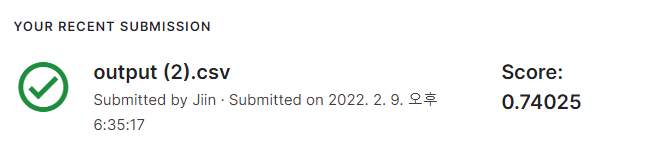


## 교수님

In [96]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('submit.csv')

In [97]:
from sklearn.preprocessing import RobustScaler
sc_X = RobustScaler()

X_train = pd.DataFrame(sc_X.fit_transform(train.drop(["Diabetes"], axis = 1)), 
                      columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                               'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc_X.transform(test), 
                      columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                               'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
y_train = train.Diabetes

In [98]:
X_train = sc_X.fit_transform(train.drop(["Diabetes"], axis = 1))
X_test = sc_X.transform(test)
                             
X_train = pd.DataFrame(X_train, 
                       columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                               'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(X_test, 
                       columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                               'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(537, 8)
(231, 8)
(537,)


In [100]:
X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.FloatTensor(np.array(y_train))
X_test = torch.FloatTensor(np.array(X_test))

In [101]:
learning_rate = 1e-2
epochs = 3000

In [102]:
feature = 8

W = torch.zeros((feature, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 클래스가 2개인 경우 Binary Cross Entropy Loss 
loss = torch.nn.BCELoss() 

# Simoid 포함된 Loss
loss = torch.nn.BCEWithLogitsLoss()

optimizer = optim.SGD([W, b], lr = learning_rate)

for epoch in range(epochs + 1):
    
    hypothesis = torch.sigmoid(X_train.matmul(W) + b)
    # 표현법 (1)
#     cost = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1 - hypothesis)).mean()
    
    # 표현법 (2)
    cost = loss(X_train.matmul(W) + b, y_train.unsqueeze(1))
    
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 500 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()))

Epoch    0/3000 Cost: 0.693147
Epoch  500/3000 Cost: 0.527966
Epoch 1000/3000 Cost: 0.489346
Epoch 1500/3000 Cost: 0.474461
Epoch 2000/3000 Cost: 0.467575
Epoch 2500/3000 Cost: 0.464061
Epoch 3000/3000 Cost: 0.462151


In [103]:
hypothesis = torch.sigmoid(X_test.matmul(W) + b)
prediction = (hypothesis >= torch.FloatTensor([0.5])).type(torch.uint8) 

In [107]:


for i, value in enumerate(prediction):
    sample["Diabetes"][i] = value.item()

sample.to_csv("output.csv", index = False)